<a href="https://colab.research.google.com/github/quent1fvr/Infection_pulmonaire/blob/Quentin/Splittage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I - Importation des données

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras

In [3]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/UV PROJET P6/COVID_dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

print(len(os.listdir('/tmp/COVID_crop/malade')))
print(len(os.listdir('/tmp/COVID_crop/normal')))
path ='/tmp/COVID_crop'

1544
1078


# II - Etude de la distribution des données "brutes"

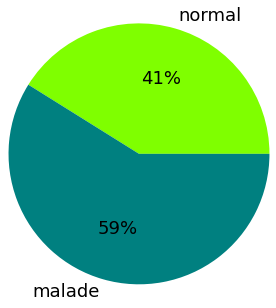

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path_malade = "/tmp/COVID_crop/malade"
path_normal = "/tmp/COVID_crop/normal"

x = np.array([len(os.listdir(path_normal)), len(os.listdir(path_malade))])
labels = ['normal', 'malade']
colors = {'normal': 'chartreuse','malade': 'teal' }
plt.pie(x, labels=labels, autopct='%.0f%%', radius=1.5, colors=[colors[key] for key in labels], textprops={'fontsize': 18})
plt.show()

[18, 21, 21, 22, 22, 22, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,

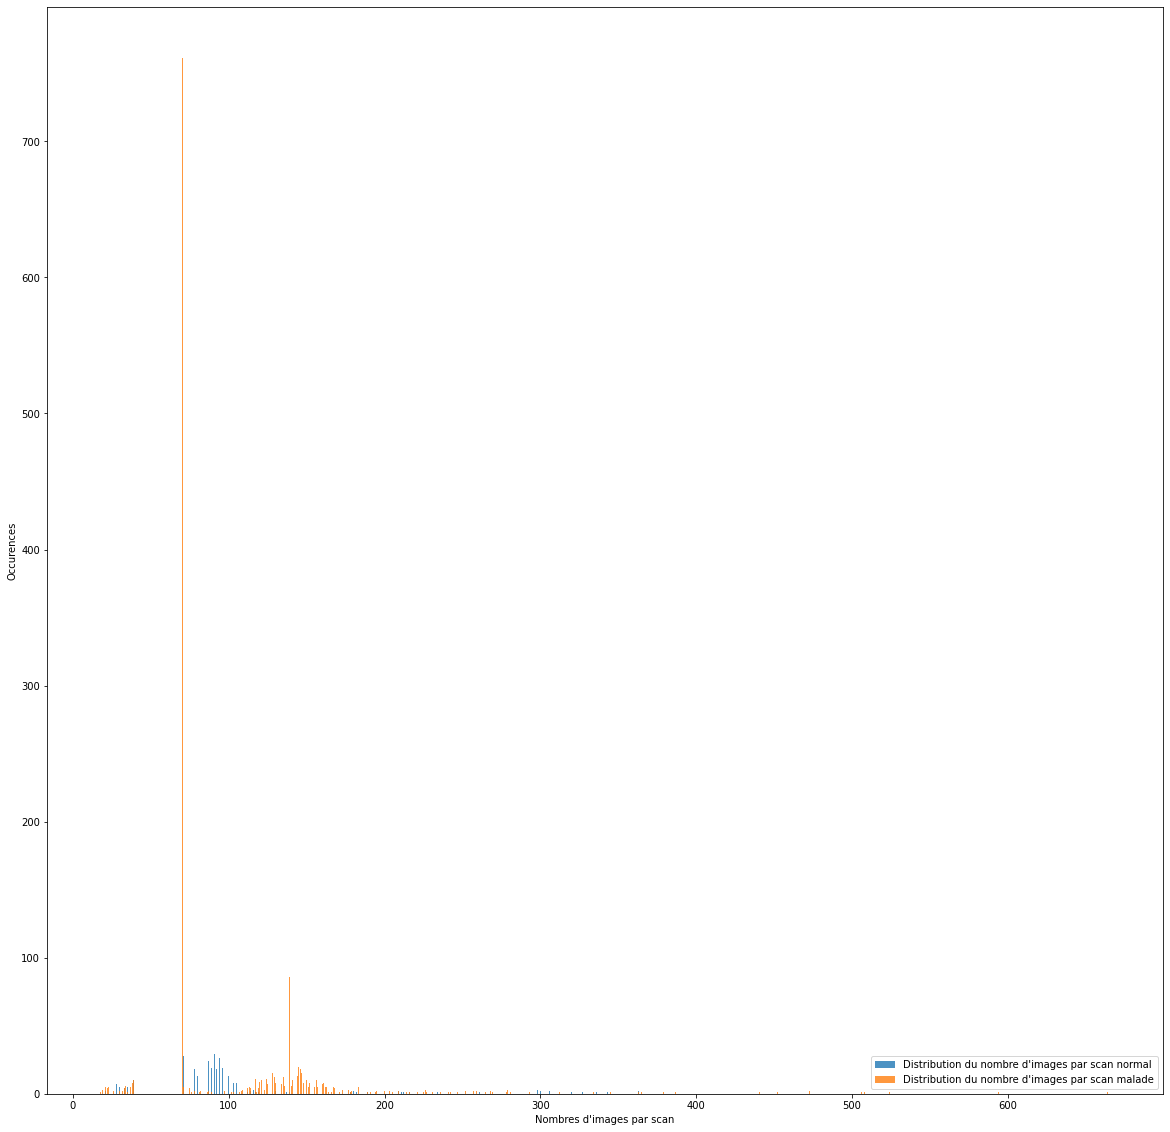

In [ ]:
#--------------------------------- Visualisation des données --------------------------------- 

plt.figure(figsize=(20, 20))

tab_normal = []
tab_malade = []

dir_normal = '/tmp/COVID_crop/normal'
dir_malade = '/tmp/COVID_crop/malade'

for base in os.walk(dir_normal):
    #print('folder "', base[0], '" containing ', len(base[2]), ' files')
    tab_normal.append(len(base[2]))
tab_normal.pop(0)
tab_normal.sort()
print(tab_normal)

for base in os.walk(dir_malade):
    #print('folder "', base[0], '" containing ', len(base[2]), ' files')
    tab_malade.append(len(base[2]))
tab_malade.pop(0)
tab_malade.sort()
print(tab_malade)

x0 = tab_normal
x1 = tab_malade

bins = max(len(x0), len(x1))

plt.hist(x0, bins, alpha=0.8, label="Distribution du nombre d'images par scan normal")
plt.hist(x1, bins, alpha=0.8, label="Distribution du nombre d'images par scan malade")
plt.legend(loc='lower right')
plt.xlabel("Nombres d'images par scan")
plt.ylabel("Occurences")
plt.show()

In [ ]:
x0 = np.array(x0)
x1 = np.array(x1)
x0_mean = np.mean(x0)
x1_mean = np.mean(x1)
avg = (59*x0_mean + 41*x1_mean)/100

print("x0_mean", x0_mean)
print("x1_mean", x1_mean)
print("avg", avg)

x0_mean 90.76530612244898
x1_mean 107.98186528497409
avg 97.82409537908428


# III - Padding des données

### 1. On élimine les scans contenant moins de 40 et plus de 100 images


In [4]:
import shutil
num_skipped = 0
for folder_name in ("normal", "malade"):
    folder_path = os.path.join("/tmp/COVID_crop", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        if len(os.listdir(fpath)) > 100 or len(os.listdir(fpath)) < 40:
            num_skipped += 1
            shutil.rmtree(fpath)

print("Deleted %d scans" % num_skipped)

Deleted 1016 scans


[40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 42, 42, 43, 43, 44, 44, 44, 44, 45, 45, 46, 48, 54, 54, 55, 55, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,

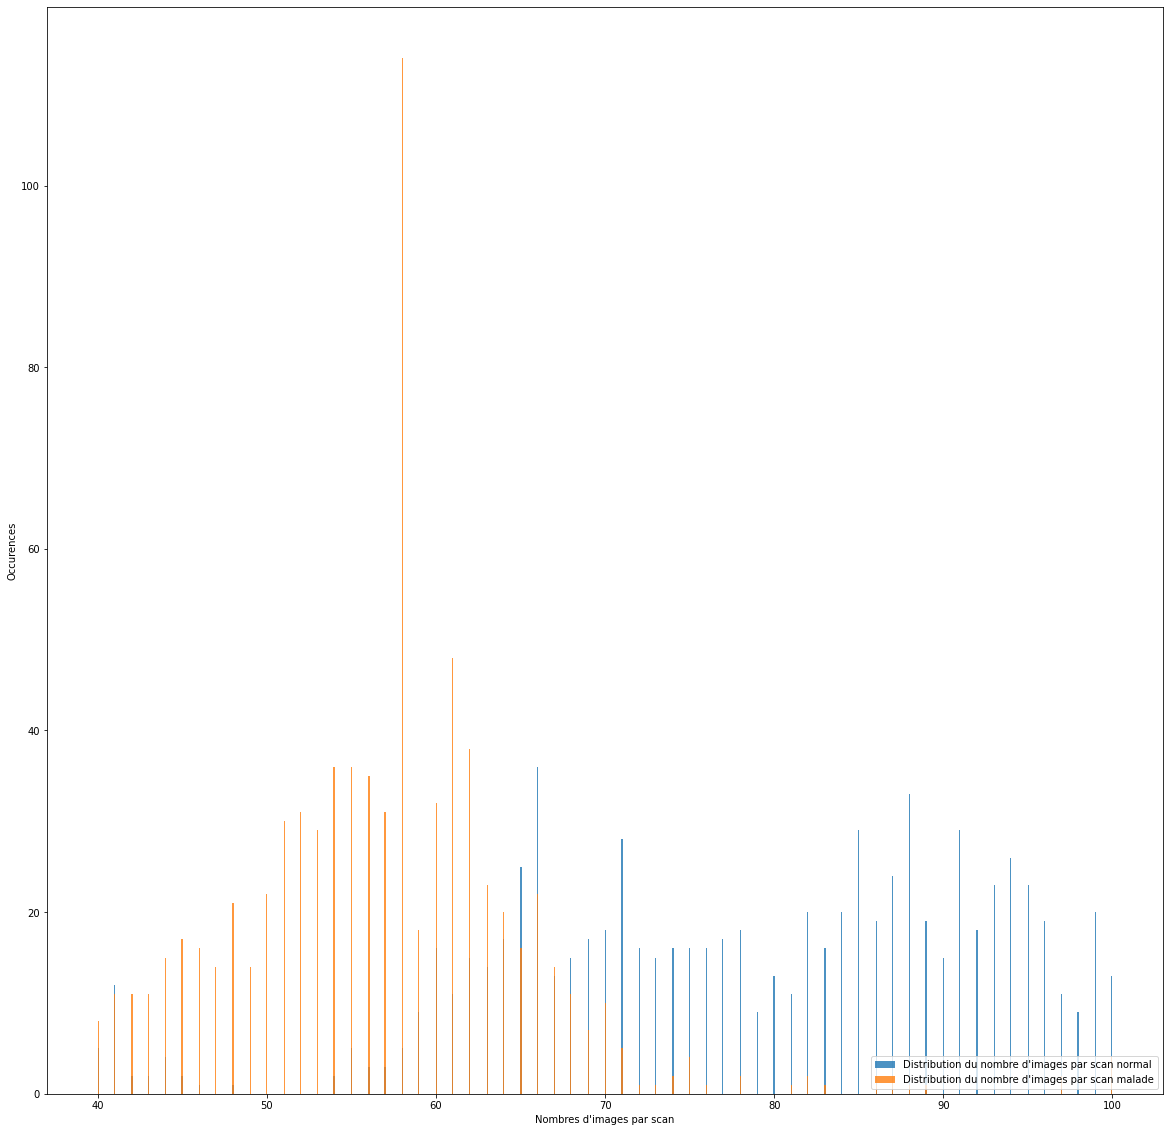

In [5]:
#--------------------------------- Visualisation des données --------------------------------- 
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))

tab_normal = []
tab_malade = []

dir_normal = '/tmp/COVID_crop/normal'
dir_malade = '/tmp/COVID_crop/malade'

for base in os.walk(dir_normal):
    #print('folder "', base[0], '" containing ', len(base[2]), ' files')
    tab_normal.append(len(base[2]))
tab_normal.pop(0)
tab_normal.sort()
print(tab_normal)

for base in os.walk(dir_malade):
    #print('folder "', base[0], '" containing ', len(base[2]), ' files')
    tab_malade.append(len(base[2]))
tab_malade.pop(0)
tab_malade.sort()
print(tab_malade)

x0 = tab_normal
x1 = tab_malade

bins = max(len(x0), len(x1))

plt.hist(x0, bins, alpha=0.8, label="Distribution du nombre d'images par scan normal")
plt.hist(x1, bins, alpha=0.8, label="Distribution du nombre d'images par scan malade")
plt.legend(loc='lower right')
plt.xlabel("Nombres d'images par scan")
plt.ylabel("Occurences")
plt.show()

In [6]:
x0 = np.array(x0)
x1 = np.array(x1)
x0_mean = np.mean(x0)
x1_mean = np.mean(x1)
avg = (59*x0_mean + 41*x1_mean)/100

print("x0_mean", x0_mean)
print("x1_mean", x1_mean)
print("avg", avg)

NameError: ignored

### 2. On comble les scans contenant moins de 70 images

#### 2.1. Comble par ajout d'images noires 

In [7]:
num_skipped = 0
from PIL import Image
for folder_name in ("normal", "malade"):
    folder_path = os.path.join("/tmp/COVID_crop", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        if len(os.listdir(fpath)) < 70:
          for i in range (70 - len(os.listdir(fpath))) : 
            new_im = Image.new('RGB', (128, 128), (0, 0, 0))
            new_im.save(fpath + "/Dark_image" + str(i), "PNG")

[70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,

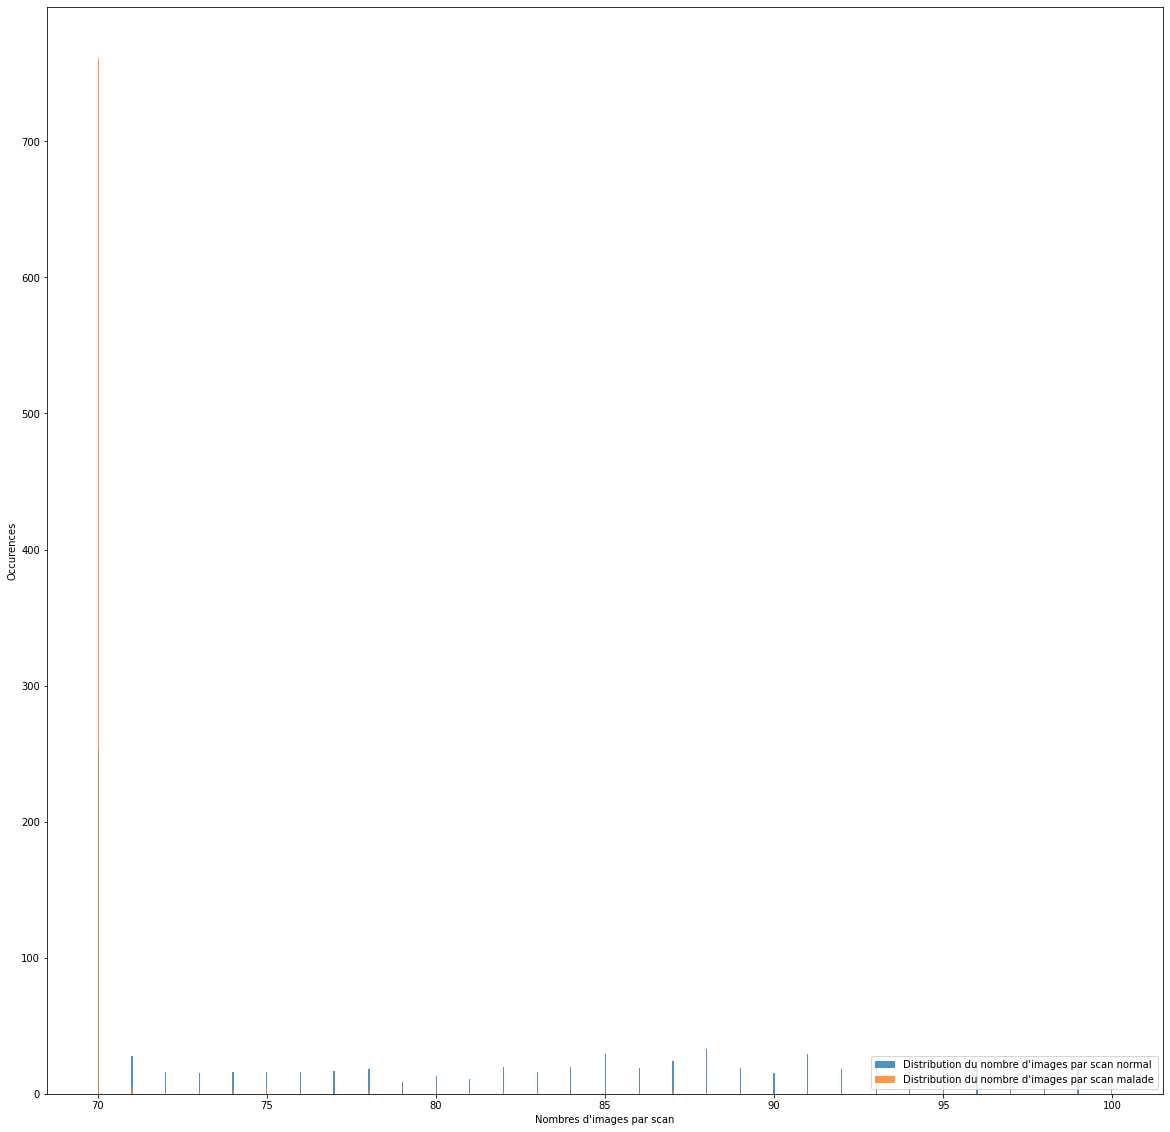

In [8]:
#--------------------------------- Visualisation des données --------------------------------- 

plt.figure(figsize=(20, 20))

tab_normal = []
tab_malade = []

dir_normal = '/tmp/COVID_crop/normal'
dir_malade = '/tmp/COVID_crop/malade'

for base in os.walk(dir_normal):
    #print('folder "', base[0], '" containing ', len(base[2]), ' files')
    tab_normal.append(len(base[2]))
tab_normal.pop(0)
tab_normal.sort()
print(tab_normal)

for base in os.walk(dir_malade):
    #print('folder "', base[0], '" containing ', len(base[2]), ' files')
    tab_malade.append(len(base[2]))
tab_malade.pop(0)
tab_malade.sort()
print(tab_malade)

x0 = tab_normal
x1 = tab_malade

bins = max(len(x0), len(x1))

plt.hist(x0, bins, alpha=0.8, label="Distribution du nombre d'images par scan normal")
plt.hist(x1, bins, alpha=0.8, label="Distribution du nombre d'images par scan malade")
plt.legend(loc='lower right')
plt.xlabel("Nombres d'images par scan")
plt.ylabel("Occurences")
plt.show()

#### 2.2. Comble par copie d'images "intéressantes"


### 3. On élimine des images dans les scans contenant plus de 70 images

#### 3.1. Elimination aléatoire

In [43]:
import shutil
import numpy as np
for folder_name in ("normal", "malade"):
    folder_path = os.path.join("/tmp/COVID_crop", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        if len(os.listdir(fpath)) > 70:
            while len(os.listdir(fpath)) !=0 :
                delete_path = fpath + "/00" + str(np.random.randint(10,len(os.listdir(fpath)))) + ".png"
                while os.path.exists(delete_path):  
                    os.remove(delete_path)
            

[70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,

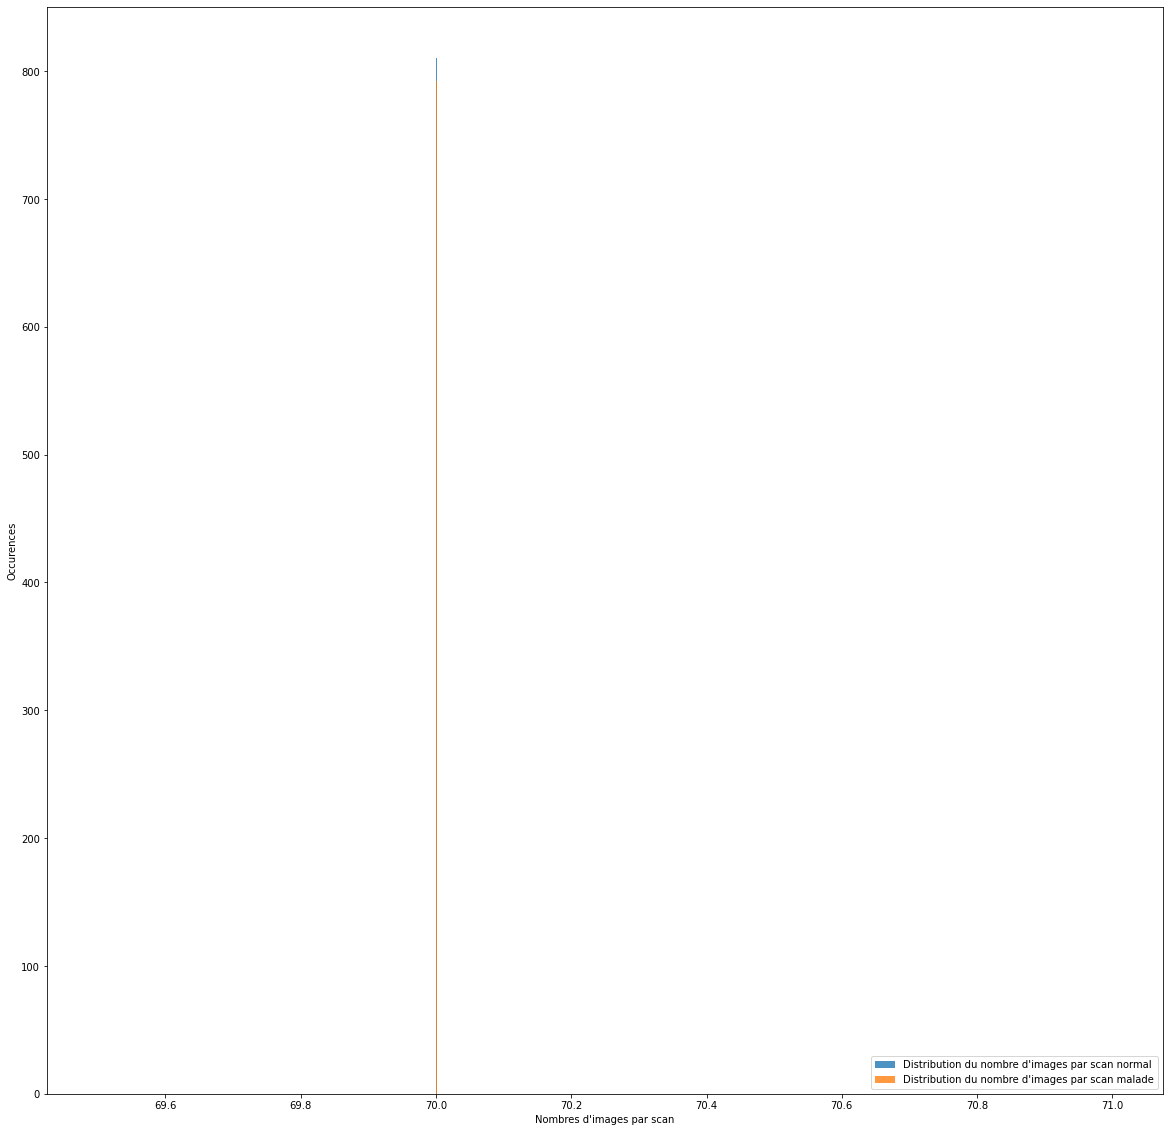

In [20]:
#--------------------------------- Visualisation des données --------------------------------- 
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

tab_normal = []
tab_malade = []

dir_normal = '/tmp/COVID_crop/normal'
dir_malade = '/tmp/COVID_crop/malade'

for base in os.walk(dir_normal):
    #print('folder "', base[0], '" containing ', len(base[2]), ' files')
    tab_normal.append(len(base[2]))
tab_normal.pop(0)
tab_normal.sort()
print(tab_normal)

for base in os.walk(dir_malade):
    #print('folder "', base[0], '" containing ', len(base[2]), ' files')
    tab_malade.append(len(base[2]))
tab_malade.pop(0)
tab_malade.sort()
print(tab_malade)

x0 = tab_normal
x1 = tab_malade

bins = max(len(x0), len(x1))

plt.hist(x0, bins, alpha=0.8, label="Distribution du nombre d'images par scan normal")
plt.hist(x1, bins, alpha=0.8, label="Distribution du nombre d'images par scan malade")
plt.legend(loc='lower right')
plt.xlabel("Nombres d'images par scan")
plt.ylabel("Occurences")
plt.show()

In [ ]:
piuehriozkk ezhiaioh aiahiuhfaiuhijrikjikhvi,vjfggh

#### 3.2. Elimination par comparaison MSE & SSIM

##### 3.2.1. Test avec deux images random

In [11]:
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils
import cv2

location_image1 = "/tmp/COVID_crop/normal/1/0015.png"
location_image2 = "/tmp/COVID_crop/normal/1/0020.png"

# load the two input images
imageA = cv2.imread(location_image1)
imageB = cv2.imread(location_image2)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(imageA, imageB, full=True, multichannel=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.6850154484352456


The ***score*** represents the structural similarity index between the two input images. This value can fall into the range [-1, 1] with a value of one being a “perfect match”.

The ***diff*** image contains the actual image differences between the two input images that we wish to visualize. The difference image is currently represented as a floating point data type in the range [0, 1] so we first convert the array to 8-bit unsigned integers in the range [0, 255] (Line 26) before we can further process it using OpenCV.

Score of similarity =  0.6850154484352456 /1

Image 1 :



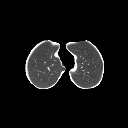


Image 2 :



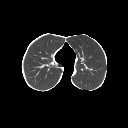


Différence :



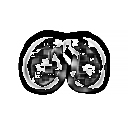

In [12]:
from google.colab.patches import cv2_imshow
# show the output images
print("Score of similarity = ", score, "/1")
print("\nImage 1 :\n")
cv2_imshow(imageA)
print("\nImage 2 :\n")
cv2_imshow(imageB)
print("\nDifférence :\n")
cv2_imshow(diff)

##### 3.2.2. Test avec une banque d'images

In [13]:
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils
import cv2
import shutil

for folder_name in ("normal", "malade"):
    folder_path = os.path.join("/tmp/COVID_crop", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        if len(os.listdir(fpath)) > 70:
            for i in range(len(os.listdir(fpath))-70):
                delete_path = fpath + "/00" + str(np.random.randint(10,len(os.listdir(fpath)))) + ".png"
                while os.path.exists(delete_path):
                    os.remove(delete_path)

location_image1 = "/tmp/COVID_crop/normal/1/0015.png"
location_image2 = "/tmp/COVID_crop/normal/1/0020.png"

# load the two input images
imageA = cv2.imread(location_image1)
imageB = cv2.imread(location_image2)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(imageA, imageB, full=True, multichannel=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.6850154484352456


Score of similarity =  0.6850154484352456 /1

Image 1 :



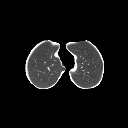


Image 2 :



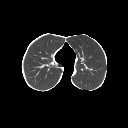


Différence :



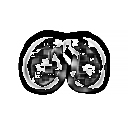

In [14]:
from google.colab.patches import cv2_imshow
# show the output images
print("Score of similarity = ", score, "/1")
print("\nImage 1 :\n")
cv2_imshow(imageA)
print("\nImage 2 :\n")
cv2_imshow(imageB)
print("\nDifférence :\n")
cv2_imshow(diff)

# IV - Etude de la distribution des données "normalisées"

# V - Phase d'entrainement du modèle



In [21]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras import backend as K
import numpy as np
import os
import math
import multiprocessing.pool


class VideoDirIterator(image.Iterator):
    def __init__(self,
                 directory,
                 video_data_generator,
                 target_size=(112,112),
                 batch_size=32,
                 clip_size=16,
                 shuffle=True,
                 allow_lt_clip_size=True,
                 seed=None,
                 data_format="channels_last",
                 save_to_dir=None,
                 save_prefix='',
                 save_format='png'):
        # TODO: parammeter explaination
        """
        directory:
        video_data_generator:
        target_size:
        batch_size:
        clip_size:
        shuffle:
        allow_lt_clip_size: whether allow the number of frames less than clip size
        seed:
        data_format: "channel_last": "NDHWC", "channel_first": "NCDHW".
        save_to_dir:
        save_prefix:
        save_format:
        """
        if data_format is None:
            data_format = K.image_data_format
        self.directory = directory
        self.video_data_generator = video_data_generator
        self.target_size = tuple(target_size)
        self.batch_size = batch_size
        self.clip_size = clip_size
        self.allow_lt_clip_size = allow_lt_clip_size
        self.data_format = data_format
        # set video shape
        if self.data_format == 'channels_last':
            self.video_shape = (self.clip_size,) + self.target_size + (3,)
        else:
            self.video_shape = (3,) + (self.clip_size,) + self.target_size
        self.save_to_dir = save_to_dir
        self.save_prefix = save_prefix
        self.save_format = save_format

        self.class_name = self._get_class_name()
        self.num_classes = len(self.class_name)
        self.class_indices = dict(zip(self.class_name, range(self.num_classes)))

        self.filenames, self.classes = self._get_filenames_and_classes()
        self.samples = len(self.filenames)

        print('Found %d videos belonging to %d classes.' % (self.samples, self.num_classes))

        super(VideoDirIterator, self).__init__(self.samples, batch_size, shuffle, seed)

    def _get_batches_of_transformed_samples(self, index_array):
        # "NDHWC": channel last
        # "NCDHW": channel first
        batch_shape = (len(index_array),) + self.video_shape
        batch_x = np.zeros(batch_shape, dtype=K.floatx())
        batch_y = np.zeros((len(batch_x), self.num_classes), dtype=K.floatx())

        for i, j in enumerate(index_array):
            # get filename, regard the filenames as video dir full path
            vfname = self.filenames[j]
            frame_list = os.listdir(vfname)
            # get list of frames, and choose clip_size of frames
            if self.allow_lt_clip_size and len(frame_list)<=self.clip_size:
                # repeat the frame list, if the length of list is less than clip size
                num = math.ceil(self.clip_size/len(frame_list))
                batch_list = num * frame_list
                batch_list = batch_list[0 : self.clip_size]
            else:
                index = np.random.randint(0, len(frame_list)-self.clip_size)
                batch_list = frame_list[index : index+self.clip_size]
            # transform
            # TODO: apply the same transformation to a clip or different transformation to each frame?
            # currently, I determin to apply the same transformation to a clip
            clip = []
            for frame in batch_list:
                img_path = os.path.join(vfname, frame)
                img = image.load_img(img_path, target_size=self.target_size)
                # convert image to array, set "channels_last" as the default data format
                # in the end convert the data format to users' configuraton
                x = image.img_to_array(img, data_format="channels_last")
                x = self.video_data_generator.random_transform(x)
                x = self.video_data_generator.standardize(x)
                clip.append(x)

            # generate batch_x
            clip = np.array(clip)
            if self.data_format == 'channels_first':
                clip = clip.transpose((3, 0, 1, 2))
            batch_x[i] = clip
            # generate batch_y
            labels = np.array(self.classes)
            for i, label in enumerate(labels[index_array]):
                batch_y[i, label] = 1

            # TODO: additional function

        return batch_x, batch_y

    def next(self):
        """For python 2.x.
        Returns:
            The next batch.
        """
        with self.lock:
            index_array = next(self.index_generator)
        # The transformation of images is not under thread lock
        # so it can be done in parallel
        return self._get_batches_of_transformed_samples(index_array)

    def _get_class_name(self):
        # traverse root dir
        class_name = []
        for subdir in sorted(os.listdir(self.directory)):
            if os.path.isdir(os.path.join(self.directory, subdir)):
                class_name.append(subdir)
        return class_name

    def _get_filenames_and_classes(self):
        filenames = []
        results = []
        # classes = np.zeros((self.samples,), dtype='int32')
        classes = []
        i = 0
        pool = multiprocessing.pool.ThreadPool()

        for dirpath in (os.path.join(self.directory, subdir)
                        for subdir in self.class_name):
            results.append(
                pool.apply_async(self._list_video_samples, (dirpath,))
            )

        for res in results:
            filename, cls = res.get()
            # classes[i:i+len(cls)] = cls
            classes = classes + cls
            filenames += filename
            i += len(cls)

        pool.close()
        pool.join()
        return filenames, classes

    def _list_video_samples(self, base_path):
        filenames = []
        classes = []
        dir_name = os.path.basename(base_path)

        for subdir in sorted(os.listdir(base_path)):
            filename = os.path.join(base_path, subdir)
            if not os.path.isdir(filename):
                continue
            if self.allow_lt_clip_size:
                filenames.append(filename)
                classes.append(self.class_indices[dir_name])
            else:
                if self._list_frame(filename):
                    filenames.append(filename)
                    classes.append(self.class_indices[dir_name])

        return filenames, classes

    def _list_frame(self, base_path):
        if len(os.listdir(base_path)) < self.clip_size:
            return False
        else:
            return True


class VideoDataGenerator(image.ImageDataGenerator):
    def __init__(self,
                 featurewise_center=False,
                 samplewise_center=False,
                 featurewise_std_normalization=False,
                 samplewise_std_normalization=False,
                 zca_whitening=False,
                 zca_epsilon=1e-6,
                 rotation_range=0.,
                 width_shift_range=0.,
                 height_shift_range=0.,
                 brightness_range=None,
                 shear_range=0.,
                 zoom_range=0.,
                 channel_shift_range=0.,
                 fill_mode='nearest',
                 cval=0.,
                 horizontal_flip=False,
                 vertical_flip=False,
                 rescale=None,
                 preprocessing_function=None,
                 data_format="channels_last",
                 validation_split=0.0):
        super(VideoDataGenerator, self).__init__(
                 featurewise_center=featurewise_center,
                 samplewise_center=samplewise_center,
                 featurewise_std_normalization=featurewise_std_normalization,
                 samplewise_std_normalization=samplewise_std_normalization,
                 zca_whitening=zca_whitening,
                 zca_epsilon=zca_epsilon,
                 rotation_range=rotation_range,
                 width_shift_range=width_shift_range,
                 height_shift_range=height_shift_range,
                 brightness_range=brightness_range,
                 shear_range=shear_range,
                 zoom_range=zoom_range,
                 channel_shift_range=channel_shift_range,
                 fill_mode=fill_mode,
                 cval=cval,
                 horizontal_flip=horizontal_flip,
                 vertical_flip=vertical_flip,
                 rescale=rescale,
                 preprocessing_function=preprocessing_function,
                 data_format=data_format,
                 validation_split=validation_split)

    def flow_from_directory(self,
                            directory,
                            target_size=(112, 112),
                            batch_size=32,
                            clip_size=16,
                            allow_lt_clip_size=True,
                            shuffle=True,
                            seed=None,
                            save_to_dir=None,
                            save_prefix='',
                            save_format='png',
                            ):
        return VideoDirIterator(
            directory,
            self,
            target_size=target_size,
            batch_size=batch_size,
            clip_size=clip_size,
            allow_lt_clip_size=allow_lt_clip_size,
            shuffle=shuffle,
            seed=None,
            data_format=self.data_format,
            save_to_dir=None,
            save_prefix='',
            save_format='png')

In [22]:
"""
source1 = "/tmp/COVID_crop/malade"
dest11 = "/tmp/dataset/test"
files = os.listdir("/tmp/COVID_crop/malade")
import shutil
import numpy as np
for f in files:
    if np.random.rand(1) < 0.2:
        shutil.move(source1 + '/'+ f, dest11 + '/'+ f)
"""
#print(len(os.listdir("/tmp/dataset/test")))

source1 = "/tmp/COVID_crop/malade"
dest11 = "/tmp/dataset/test/malade"
files = os.listdir("/tmp/COVID_crop/malade")
import shutil
import numpy as np
for f in files:
    if np.random.rand(1) < 0.2:
        shutil.move(source1 + '/'+ f, dest11 + '/'+ f)



In [23]:
source1 = "/tmp/COVID_crop/malade"
dest11 = "/tmp/dataset/train/malade"
files = os.listdir("/tmp/COVID_crop/malade")
import shutil
import numpy as np
for f in files:
    if np.random.rand(1) < 0.8:
        shutil.move(source1 + '/'+ f, dest11 + '/'+ f)

In [24]:
source1 = "/tmp/COVID_crop/malade"
dest11 = "/tmp/dataset/validation/malade"
files = os.listdir("/tmp/COVID_crop/malade")
import shutil
import numpy as np
for f in files:
   shutil.move(source1 + '/'+ f, dest11 + '/'+ f)

In [28]:
source1 = "/tmp/COVID_crop/normal"
dest11 = "/tmp/dataset/test/normal"
files = os.listdir("/tmp/COVID_crop/normal")
import shutil
import numpy as np
for f in files:
    if np.random.rand(1) < 0.2:
        shutil.move(source1 + '/'+ f, dest11 + '/'+ f)

In [29]:
source1 = "/tmp/COVID_crop/normal"
dest11 = "/tmp/dataset/train/normal"
files = os.listdir("/tmp/COVID_crop/normal")
import shutil
import numpy as np
for f in files:
    if np.random.rand(1) < 0.8:
        shutil.move(source1 + '/'+ f, dest11 + '/'+ f)

In [30]:
source1 = "/tmp/COVID_crop/normal"
dest11 = "/tmp/dataset/validation/normal"
files = os.listdir("/tmp/COVID_crop/normal")
import shutil
import numpy as np
for f in files:
    shutil.move(source1 + '/'+ f, dest11 + '/'+ f)

In [32]:

gen = VideoDataGenerator(rescale = 1./255)
training_set = gen.flow_from_directory(
        directory="/tmp/dataset/train",
        target_size=(128,128),
        allow_lt_clip_size=True,
        shuffle=True
    )
test_set = gen.flow_from_directory(
        directory="/tmp/dataset/test",
        target_size=(128,128),
        allow_lt_clip_size=True,
        shuffle=True
    )
validation_set = gen.flow_from_directory(
        directory="/tmp/dataset/validation",
        target_size=(128,128),
        allow_lt_clip_size=True,
        shuffle=True
    )


Found 1037 videos belonging to 2 classes.
Found 312 videos belonging to 2 classes.
Found 257 videos belonging to 2 classes.
